<a href="https://colab.research.google.com/github/YashBurman1/MiniProjects/blob/main/Time_series_Analysis_bitCoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import numpy as np
plt.style.use("dark_background")

In [2]:
pd.options.mode.use_inf_as_na = True

In [3]:
%pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.0 MB/s eta 0:00:00


In [4]:
%pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
%pip install statsmodels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **IMPORTING THE DATASET**

In [6]:
import opendatasets as od

In [7]:
od.download("https://www.kaggle.com/datasets/nisargchodavadiya/bitcoin-time-series-with-different-time-intervals")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yashburman1
Your Kaggle Key: ··········


100%|██████████| 234k/234k [00:00<00:00, 48.5MB/s]

In [9]:
file = ('/content/bitcoin-time-series-with-different-time-intervals/BTC-USD-1-DAY.csv')
df =  pd.read_csv(file)

## **DATA PREPROCESSING**

In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],utc =True)
df.dtypes 

Date         datetime64[ns, UTC]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Adj Close                float64
Volume                   float64
dtype: object

In [ ]:
df.set_index("Date",inplace = True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+00:00,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,1.856566e+10
2020-01-02 00:00:00+00:00,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
2020-01-03 00:00:00+00:00,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
2020-01-04 00:00:00+00:00,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
2020-01-05 00:00:00+00:00,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10
...,...,...,...,...,...,...
2021-10-23 00:00:00+00:00,60694.628906,61743.878906,59826.523438,61393.617188,61393.617188,2.688255e+10
2021-10-24 00:00:00+00:00,61368.343750,61505.804688,59643.343750,60930.835938,60930.835938,2.731618e+10
2021-10-25 00:00:00+00:00,60893.925781,63729.324219,60691.800781,63039.824219,63039.824219,3.106491e+10


In [ ]:
df_ = df[["Adj Close"]]
df_.replace([np.inf, -np.inf], np.nan, inplace=True)
df_.dropna()
df_

<ipython-input-11-93f9f690daa3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.replace([np.inf, -np.inf], np.nan, inplace=True)


,Adj Close
Date,
2020-01-01 00:00:00+00:00,7200.174316
2020-01-02 00:00:00+00:00,6985.470215
2020-01-03 00:00:00+00:00,7344.884277
2020-01-04 00:00:00+00:00,7410.656738
2020-01-05 00:00:00+00:00,7411.317383
...,...
2021-10-23 00:00:00+00:00,61393.617188
2021-10-24 00:00:00+00:00,60930.835938
2021-10-25 00:00:00+00:00,63039.824219


In [ ]:
df_1 = df_.dropna(axis = 0)

 **Testing for Stationarity Using Dickey-Fuller test**

In [ ]:
from statsmodels.tsa.stattools import adfuller 

In [ ]:
adf_,pvalue_,used_lag,nobs,critical_values_,ic_best_ = adfuller(df_1)
if pvalue_ > 0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is not stationary


In [ ]:
pvalue_

0.9199439681135786

In [ ]:
df_1["year"] = [d.year for d in df_1.index]
df_1["Month"] = [d.strftime("%b") for d in df_1.index]


<ipython-input-16-69e723abde9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["year"] = [d.year for d in df_1.index]
<ipython-input-16-69e723abde9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Month"] = [d.strftime("%b") for d in df_1.index]


In [ ]:
df_1.dtypes

Adj Close    float64
year           int64
Month         object
dtype: object

<Axes: xlabel='year', ylabel='Adj Close'>

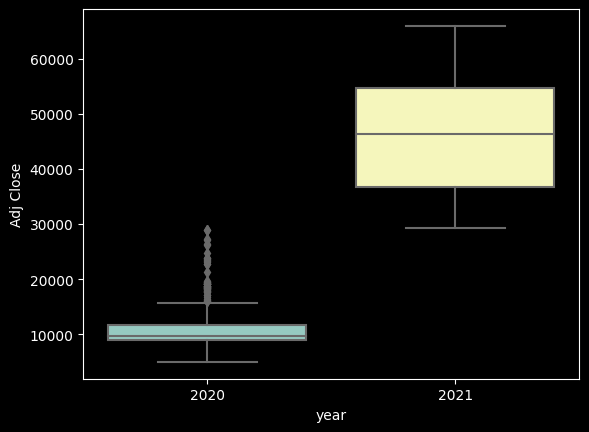

In [ ]:
sns.boxplot(x = "year", y = "Adj Close",data = df_1)

<Axes: xlabel='Month', ylabel='Adj Close'>

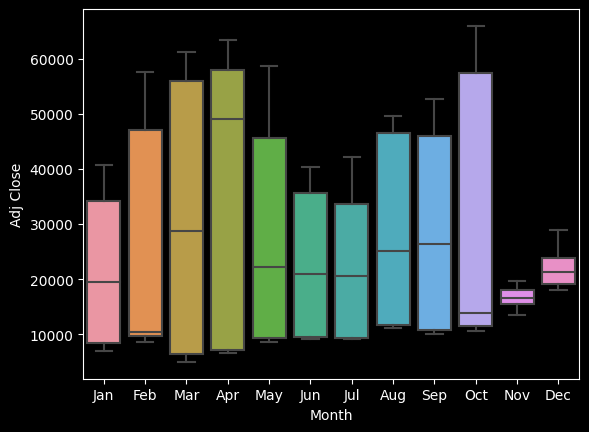

In [ ]:
sns.boxplot(x = "Month", y = "Adj Close",data = df_1)

**Decoposing the Time Series into Trend , Seasonality and Residual**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df.index = pd.to_datetime(df.index,utc =True)

In [ ]:
decompose = seasonal_decompose(df_1["Adj Close"],model = "additive",period = 30)
trend = decompose.trend
seasonal = decompose.seasonal 
residual = decompose.resid


<function matplotlib.pyplot.show(close=None, block=None)>

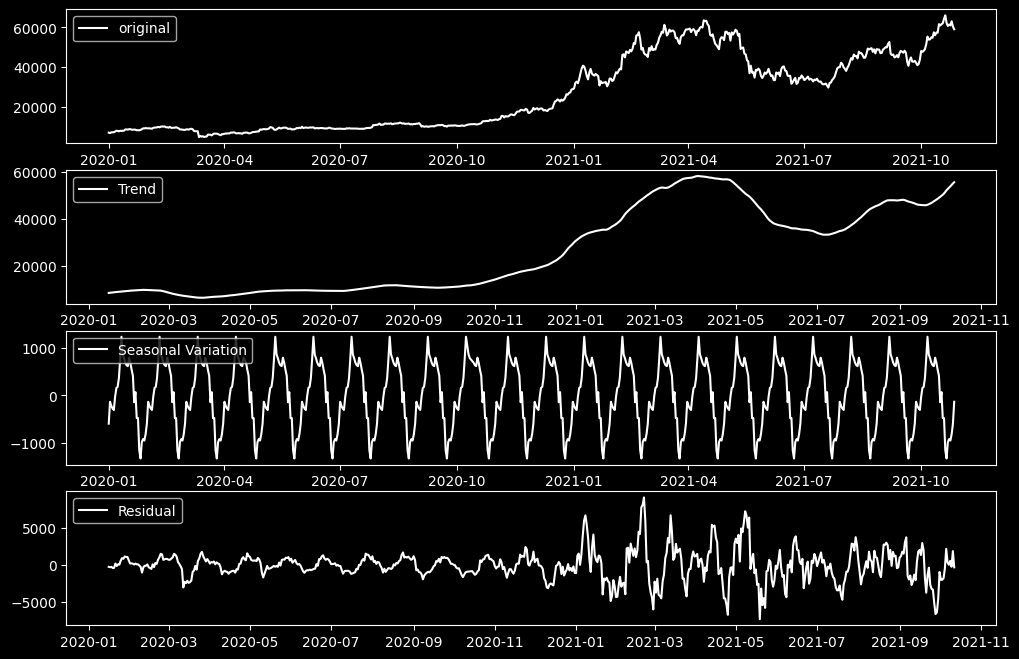

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(411)
plt.plot(df_1["Adj Close"],label = "original", color = "white")
plt.legend(loc = "upper left")
plt.subplot(412)
plt.plot(trend,label = "Trend", color = "white")
plt.legend(loc = "upper left")
plt.subplot(413)
plt.plot(seasonal,label = "Seasonal Variation", color = "white")
plt.legend(loc = "upper left")
plt.subplot(414)
plt.plot(residual,label = "Residual", color = "white")
plt.legend(loc = "upper left")
plt.show

## **FITTING A TIME SERIES MODEL**

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
arima_model = auto_arima(df_1["Adj Close"],start_p = 1 , d = 1 , start_q = 1,
                                           max_p = 7 ,max_d = 7, max_q = 7, m = 12,
                                           start_P = 0, D =1 , start_Q=0,
                                           max_P = 7, max_D = 7, max_Q = 14,
                                           seasonal = True, trace = True, error_action = "ignore", suppress_warnings = True, stepwise = True , n_fits = 50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=11701.704, Time=0.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=11702.406, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=11447.331, Time=2.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=11699.713, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=11398.817, Time=6.42 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=11351.368, Time=22.63 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=11338.725, Time=27.98 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=11332.990, Time=34.73 sec
 ARIMA(1,1,0)(6,1,0)[12]             : AIC=11313.650, Time=59.69 sec
 ARIMA(1,1,0)(7,1,0)[12]             : AIC=11306.325, Time=110.31 sec
 ARIMA(1,1,0)(7,1,1)[12]             : AIC=inf, Time=172.70 sec
